In [1]:
import pmagpy.pmag as pmag
import pmagpy.ipmag as ipmag

import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', -1)
from IPython.core.display import HTML
import numpy as np
import scipy as sp
from scipy import special

%matplotlib inline
%config InlineBackend.figure_formats = {'svg',}

In [2]:
from mpl_toolkits.basemap import Basemap

def pole_figure_appearance():
    plt.figure(figsize=(6, 6))
    m.drawcoastlines(linewidth=0.25)
    m.fillcontinents(color='bisque',lake_color='white',zorder=1)
    m.drawmapboundary(fill_color='white')
    m.drawmeridians(np.arange(0,360,30))
    m.drawparallels(np.arange(-90,90,30))

In [3]:
CF_sites = pd.read_csv('../Data_New/Paleomagnetism/Copper_Falls/sites.txt', sep='\t', skiprows=1)
CF_sites_geo = CF_sites.loc[CF_sites.dir_tilt_correction==0.0]
CF_sites_tc = CF_sites.loc[CF_sites.dir_tilt_correction==100.0]
CF_sites_HC_geo = CF_sites.loc[(CF_sites.dir_tilt_correction==0.0)&(CF_sites.dir_comp_name=='HC')]
CF_sites_HC_tc = CF_sites.loc[(CF_sites.dir_tilt_correction==100.0)&(CF_sites.dir_comp_name=='HC')]
CF_sites_tc.reset_index(inplace=True, drop=True)
CF_sites_HC_tc.reset_index(inplace=True, drop=True)
CF_sites_HC_tc = ipmag.vgp_calc(CF_sites_HC_tc, site_lon='lon', site_lat='lat', dec_tc = 'dir_dec', inc_tc='dir_inc')
CF_sites_HC_tc_normal = CF_sites_HC_tc.loc[(CF_sites_HC_tc.dir_polarity=='n') | (CF_sites_HC_tc.dir_polarity=='t')]
CF_sites_HC_tc_reversed = CF_sites_HC_tc.loc[(CF_sites_HC_tc.dir_polarity=='r')]
CF_sites_geo.reset_index(inplace=True, drop=True)
CF_sites_HC_geo.reset_index(inplace=True, drop=True)
CF_sites_HC_tc_normal.reset_index(inplace=True, drop=True)
CF_sites_HC_tc_reversed.reset_index(inplace=True, drop=True)

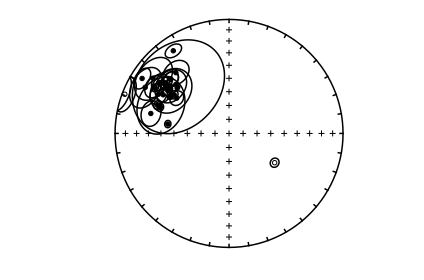

In [4]:
plt.figure(1)
ipmag.plot_net(1)
for i in range(len(CF_sites_HC_tc)):
    ipmag.plot_di_mean(CF_sites_HC_tc.dir_dec[i], CF_sites_HC_tc.dir_inc[i], CF_sites_HC_tc.dir_alpha95[i])

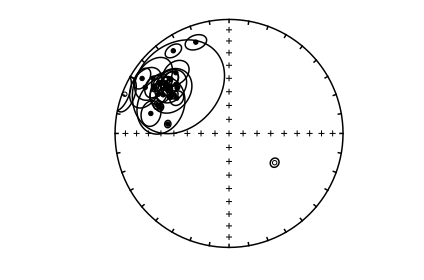

In [5]:
# including LC fit for CF17...
plt.figure(1)
ipmag.plot_net(1)
for i in range(len(CF_sites_tc)):
    ipmag.plot_di_mean(CF_sites_tc.dir_dec[i], CF_sites_tc.dir_inc[i], CF_sites_tc.dir_alpha95[i])

In [6]:
CF_vgps = ipmag.make_di_block(CF_sites_HC_tc['vgp_lon'].tolist(), CF_sites_HC_tc['vgp_lat'].tolist())
CF_vgps_norm = ipmag.make_di_block(CF_sites_HC_tc_normal['vgp_lon'].tolist(), CF_sites_HC_tc_normal['vgp_lat'].tolist())
CF_vgps_rev = ipmag.make_di_block(CF_sites_HC_tc_reversed['vgp_lon'].tolist(), CF_sites_HC_tc_reversed['vgp_lat'].tolist())
CF_pole_norm = pmag.fisher_mean(CF_vgps_norm)
ipmag.print_pole_mean(CF_pole_norm)

Plon: 166.4  Plat: 34.5
Number of directions in mean (n): 28
Angular radius of 95% confidence (A_95): 3.9
Precision parameter (k) estimate: 49.7


In [7]:
CF_vgps_norm = ipmag.make_di_block(CF_sites_HC_tc_normal.vgp_lon.tolist() +
                                   CF_sites_HC_tc_reversed.vgp_lon_rev.tolist(),
                                   CF_sites_HC_tc_normal.vgp_lat.tolist() +
                                   CF_sites_HC_tc_reversed.vgp_lat_rev.tolist())
CF_pole_norm = pmag.fisher_mean(CF_vgps_norm)
ipmag.print_pole_mean(CF_pole_norm)

Plon: 166.9  Plat: 34.9
Number of directions in mean (n): 29
Angular radius of 95% confidence (A_95): 3.9
Precision parameter (k) estimate: 48.6


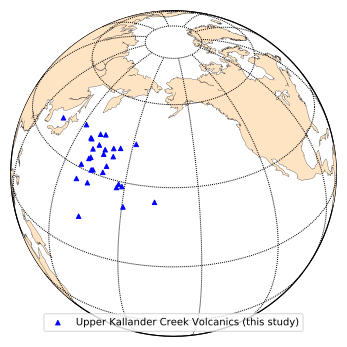

In [11]:
m = Basemap(projection='ortho',lat_0=35,lon_0=200,resolution='c',area_thresh=50000)
pole_figure_appearance()
ipmag.plot_vgp(m,di_block=CF_vgps_norm,label='Upper Kallander Creek Volcanics (this study)', color='blue', marker='^')
plt.legend(loc=8)
plt.savefig('Plots/CF_vgps.pdf')
# ipmag.plot_pole(m, CF_pole_norm['dec'], CF_pole_norm['inc'], CF_pole_norm['alpha95'])

In [9]:
# array to correct CF geo directions by Oronto bedding
tilt_secondary_array = ipmag.make_diddd_array(CF_sites_HC_geo.dir_dec.tolist(),
                                              CF_sites_HC_geo.dir_inc.tolist(),
                                              [293.87473244540018]*29,
                                              [82.477564691391265]*29)

In [10]:
pre_Oronto_dec = []
pre_Oronto_inc = []
for i in tilt_secondary_array:
    dec, inc = pmag.dotilt(i[0], i[1], i[2], i[3])
    pre_Oronto_dec.append(dec)
    pre_Oronto_inc.append(inc)

In [11]:
# array to correct CF geo directions by Oronto bedding
tilt_primary_array = ipmag.make_diddd_array(pre_Oronto_dec,
                                            pre_Oronto_inc,
                                            [60.335394583070581]*29,
                                            [40.659643136794422]*29)
CF_dec_tc2 = []
CF_inc_tc2 = []
for i in tilt_primary_array:
    dec, inc = pmag.dotilt(i[0], i[1], i[2], i[3])
    CF_dec_tc2.append(dec)
    CF_inc_tc2.append(inc)

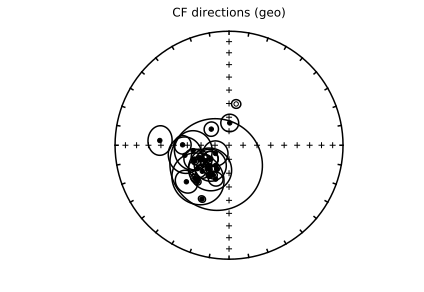

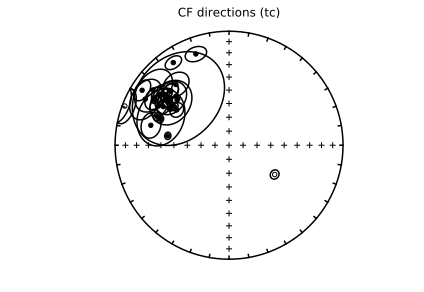

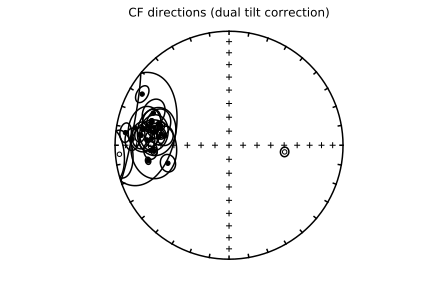

In [12]:
plt.figure(1)
ipmag.plot_net(1)
for i in range(len(CF_sites_geo)):
    ipmag.plot_di_mean(CF_sites_geo.dir_dec[i], CF_sites_geo.dir_inc[i], CF_sites_geo.dir_alpha95[i])
plt.title('CF directions (geo)')
plt.show()

plt.figure(1)
ipmag.plot_net(1)
for i in range(len(CF_sites_geo)):
    ipmag.plot_di_mean(CF_sites_tc.dir_dec[i], CF_sites_tc.dir_inc[i], CF_sites_tc.dir_alpha95[i])
plt.title('CF directions (tc)')
plt.show()

plt.figure(1)
ipmag.plot_net(1)
for i in range(len(CF_dec_tc2)):
    ipmag.plot_di_mean(CF_dec_tc2[i], CF_inc_tc2[i], CF_sites_geo.dir_alpha95[i])
plt.title('CF directions (dual tilt correction)')
plt.show()

In [13]:
CF_sites_tc2 = CF_sites_HC_tc.copy()
for i in range(len(CF_sites_tc2)):
    CF_sites_tc2['dir_dec'][i] = CF_dec_tc2[i]
    CF_sites_tc2['dir_inc'][i] = CF_inc_tc2[i]
CF_sites_tc2 = ipmag.vgp_calc(CF_sites_tc2, site_lon='lon',
                              site_lat='lat', dec_tc = 'dir_dec',
                              inc_tc='dir_inc')

In [14]:
CF_sites_tc2_normal = CF_sites_tc2.loc[(CF_sites_tc2.dir_polarity=='n') | (CF_sites_tc2.dir_polarity=='t')]
CF_sites_tc2_reversed = CF_sites_tc2.loc[(CF_sites_tc2.dir_polarity=='r')]

In [15]:
CF_vgps_norm_tilt2 = ipmag.make_di_block(CF_sites_tc2_normal.vgp_lon.tolist() +
                                   CF_sites_tc2_reversed.vgp_lon_rev.tolist(),
                                   CF_sites_tc2_normal.vgp_lat.tolist() +
                                   CF_sites_tc2_reversed.vgp_lat_rev.tolist())
CF_pole_norm_tilt2 = pmag.fisher_mean(CF_vgps_norm_tilt2)
ipmag.print_pole_mean(CF_pole_norm_tilt2)

Plon: 185.3  Plat: 16.8
Number of directions in mean (n): 29
Angular radius of 95% confidence (A_95): 3.8
Precision parameter (k) estimate: 49.8


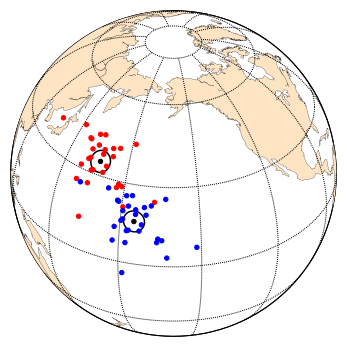

In [16]:
m = Basemap(projection='ortho',lat_0=35,lon_0=200,resolution='c',area_thresh=50000)
pole_figure_appearance()
ipmag.plot_vgp(m,di_block=CF_vgps_norm,label='Upper Kallander Creek volcanics', color='red')
ipmag.plot_pole(m, CF_pole_norm['dec'], CF_pole_norm['inc'], CF_pole_norm['alpha95'])
ipmag.plot_vgp(m,di_block=CF_vgps_norm_tilt2,label='Upper Kallander Creek volcanics', color='blue')
ipmag.plot_pole(m, CF_pole_norm_tilt2['dec'], CF_pole_norm_tilt2['inc'], CF_pole_norm_tilt2['alpha95'])

In [17]:
# pd.set_option('precision', 1)
CF_sites_tc2_copy = CF_sites_tc2.rename(columns={'dir_dec':'dir_dec_tc2', 'dir_inc':'dir_inc_tc2'})
CF_sites_tc2_copy.set_index('site', inplace=True)
CF_sites_tc.set_index('site', inplace=True)
CF_site_table_output = CF_sites_tc.join(CF_sites_tc2_copy[['dir_dec_tc2','dir_inc_tc2']])

In [18]:
%%capture CF_table
print(CF_site_table_output.to_latex(columns=['lat','lon', 'dir_n_samples','dir_dec','dir_inc','dir_dec_tc2', 'dir_inc_tc2','dir_k','dir_r','dir_alpha95']))

In [19]:
CF_table.show()

\begin{tabular}{lrrrrrrrrrr}
\toprule
{} &        lat &        lon &  dir\_n\_samples &  dir\_dec &  dir\_inc &  dir\_dec\_tc2 &  dir\_inc\_tc2 &   dir\_k &   dir\_r &  dir\_alpha95 \\
site &            &            &                &          &          &              &              &         &         &              \\
\midrule
CF1  &  46.375233 & -90.636919 &  3.0 &  306.3 &  36.4 &  280.709690 &  35.041734 &  66.0 &  2.9699 &  15.2 \\
CF10 &  46.373933 & -90.635701 &  2.0 &  292.2 &  34.9 &  266.916973 &  33.488176 &  185.0 &  1.9946 &  18.5 \\
CF11 &  46.373864 & -90.635634 &  3.0 &  300.4 &  33.5 &  274.950167 &  32.166855 &  603.0 &  2.9967 &  5.0 \\
CF12 &  46.373605 & -90.635231 &  8.0 &  290.8 &  35.8 &  265.420342 &  34.386180 &  476.0 &  7.9853 &  2.5 \\
CF13 &  46.373614 & -90.635440 &  7.0 &  299.1 &  29.9 &  273.683625 &  28.552994 &  86.0 &  6.9299 &  6.6 \\
CF14 &  46.373697 & -90.635365 &  7.0 &  326.0 &  13.6 &  300.470883 &  12.568339 &  139.0 &  6.9569 &  5.1 \\
CF